In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

plt.style.use("fivethirtyeight")
%matplotlib inline

pd.set_option('display.max_columns', 30)

In [ ]:
df = pd.read_csv(r"C:\Users\avina\Downloads\EDA-20240217T045854Z-001\EDA\us_perm_visas.csv")

In [ ]:
df

In [ ]:
df.isnull().sum()

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.dtypes

In [ ]:
df.columns.values

In [ ]:
df['case_number']

In [ ]:
df['case_no'] 

In [ ]:
df.drop("case_no", axis=1, inplace=True)

In [ ]:
df.columns.values

In [ ]:
df.case_status.unique()

In [ ]:
df = df[df.case_status != "Withdrawn"] # Withdrawn application should not be analyzed 

In [ ]:
df.case_status.unique()

In [ ]:
df.loc[df.case_status == 'Certified-Expired','case_status']='Certified' # updating from Certified-Expired to Certified

In [ ]:
df.case_status.unique()

In [ ]:
df.case_status.value_counts(normalize=True)

In [ ]:
df.dropna(axis=1, how='all', inplace=True) # drop all the columns which has null in all columns

In [ ]:
df.dropna(axis=0, how='all', inplace=True) # drop all the rows which has null in all rows

In [ ]:
df.columns

In [ ]:
df.application_type

In [ ]:
df.application_type.value_counts(normalize=True)

In [ ]:
df.application_type.value_counts().plot(kind='bar', color='red')

In [ ]:
sns.countplot(data=df,x='application_type')

In [ ]:
df.columns

In [ ]:
df.us_economic_sector

In [ ]:
economic_sector = df.us_economic_sector.value_counts()

In [ ]:
economic_sector

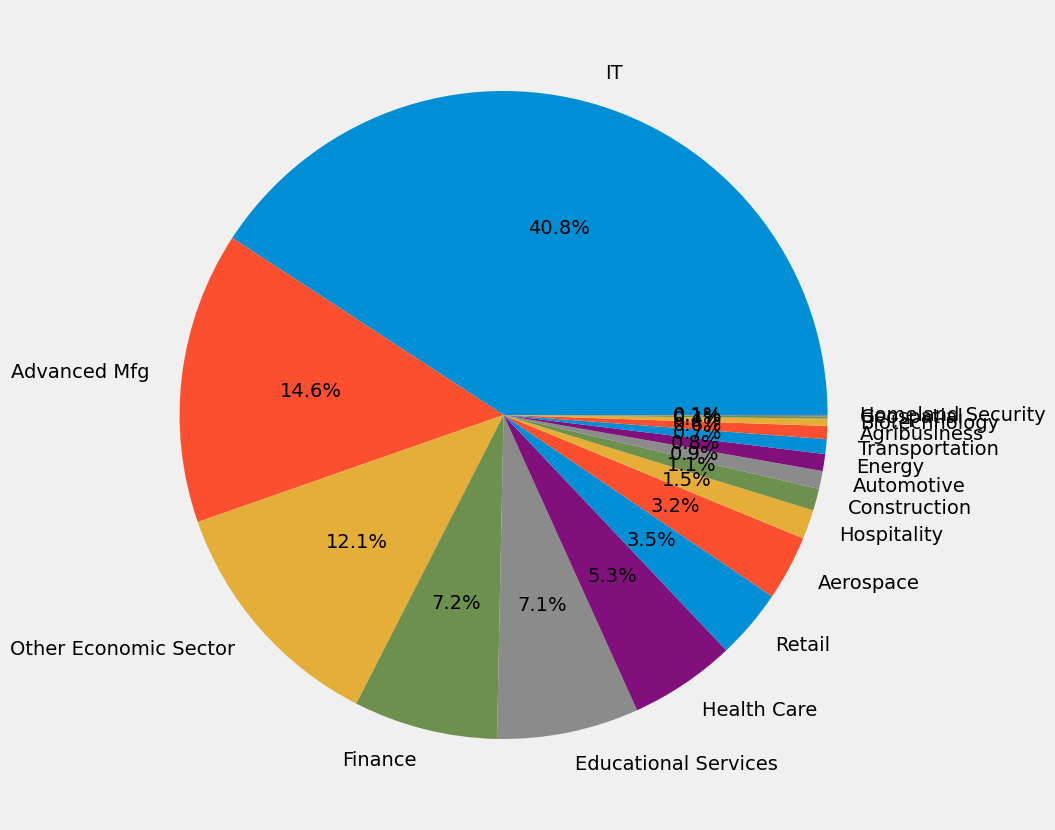

In [57]:
plt.figure(figsize=(10,10))
plt.pie(economic_sector, labels=economic_sector.index, autopct='%1.1f%%')
plt.show()

In [56]:
df.decision_date

0         2012-02-01
1         2011-12-21
2         2011-12-01
3         2011-12-01
4         2012-01-26
             ...    
374349    2016-12-30
374350    2016-12-30
374351    2016-12-30
374352    2016-12-30
374353    2016-12-30
Name: decision_date, Length: 356168, dtype: object

In [59]:
df.decision_date = pd.to_datetime(df.decision_date)
df['year']= df.decision_date.dt.year

In [60]:
df['year']

0         2012
1         2011
2         2011
3         2011
4         2012
          ... 
374349    2016
374350    2016
374351    2016
374352    2016
374353    2016
Name: year, Length: 356168, dtype: int32

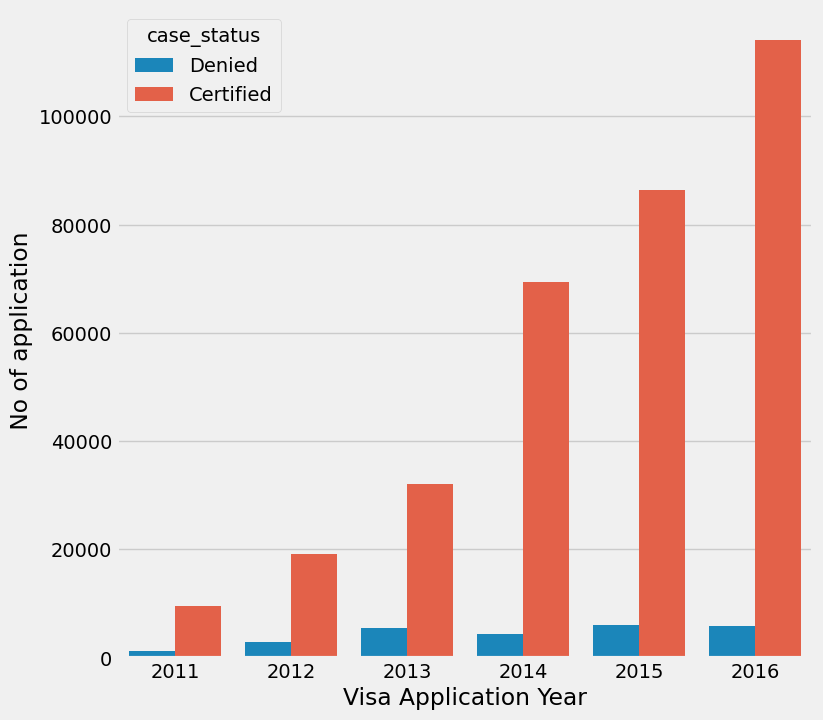

In [62]:
figure, aixs = plt.subplots(figsize=(8,8))
sns.countplot(x='year', hue='case_status',data=df)
aixs.set(xlabel="Visa Application Year", ylabel=" No of application")
plt.show()

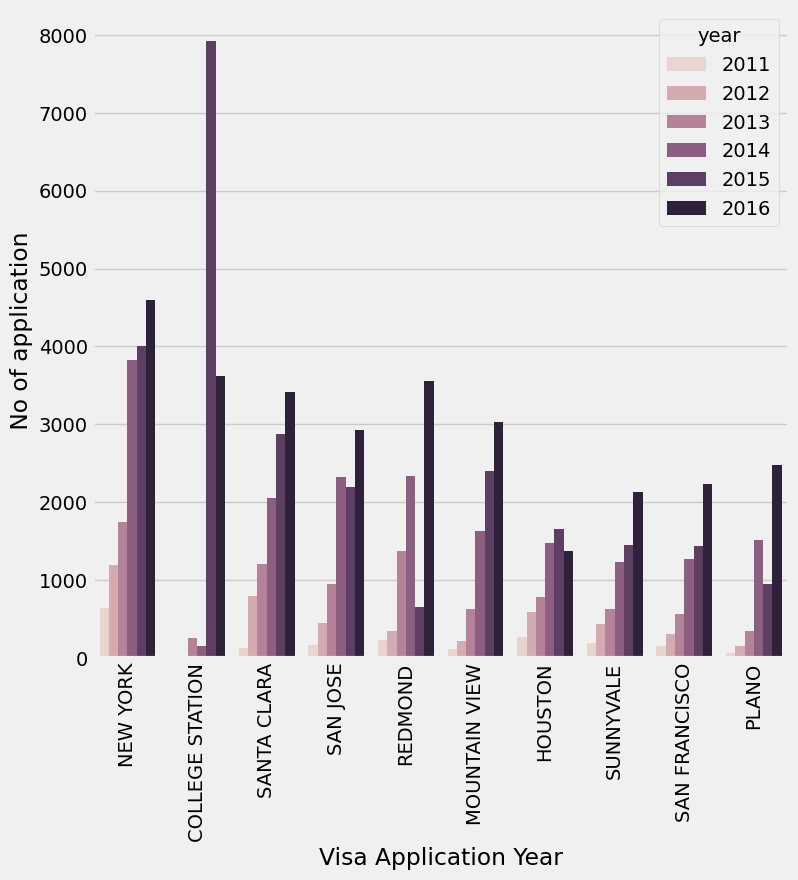

In [64]:
figure, aixs = plt.subplots(figsize=(8,8))
sns.countplot(x='employer_city', hue='year',data=df, order=df.employer_city.value_counts().iloc[:10].index)
aixs.set(xlabel="Visa Application Year", ylabel=" No of application")
plt.xticks(rotation=90)
plt.show()